<a href="https://colab.research.google.com/github/InsupCode/ML_Interpretability/blob/main/Doc_class_Abstract_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
A_train = pd.read_csv("/content/Abstract_train_df.csv")
A_test = pd.read_csv("/content/Absract_test_df.csv")

In [3]:
A_train.columns[:6]

Index(['pmid', 'cleaned_abstract', 'label', 'cleaned_abstract_tfidf_10',
       'cleaned_abstract_tfidf_2019', 'cleaned_abstract_tfidf_2020'],
      dtype='object')

## Split data

In [4]:
X_train = A_train.drop(columns=['pmid', 'cleaned_abstract', 'label'])  # Replace 'target' with your actual target column name
X_train = X_train.select_dtypes(include=['number'])
y_train = A_train['label']

X_test = A_test.drop(columns=['pmid', 'cleaned_abstract', 'label'])
X_test = X_test.select_dtypes(include=['number'])
y_test = A_test['label']

In [5]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

## Model and training

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

model_lr = LogisticRegression(max_iter=1000)

In [10]:
#Train
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
y_pred = model_lr.predict(X_test)

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8484848484848485

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        36
           1       0.78      0.93      0.85        30

    accuracy                           0.85        66
   macro avg       0.86      0.86      0.85        66
weighted avg       0.86      0.85      0.85        66



In [13]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[28  8]
 [ 2 28]]


In [14]:
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nClass Mapping:", class_mapping)


Class Mapping: {'General Info': 0, 'Transmission': 1}


In [16]:
#To save model:
# save the model as a pickle file
import pickle
model_pkl_file = "LR_Abstract_Doc_classification.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model_lr, file)

### Data for explanation

In [17]:
X_test.head()

cleaned_abstract_tfidf_10  cleaned_abstract_tfidf_2019  \
0                        0.0                     0.000000   
1                        0.0                     0.000000   
2                        0.0                     0.102087   
3                        0.0                     0.000000   
4                        0.0                     0.000000   

   cleaned_abstract_tfidf_2020  cleaned_abstract_tfidf_95  \
0                      0.00000                   0.000000   
1                      0.06452                   0.422513   
2                      0.00000                   0.000000   
3                      0.00000                   0.000000   
4                      0.00000                   0.000000   

   cleaned_abstract_tfidf_acute  cleaned_abstract_tfidf_age  \
0                      0.000000                         0.0   
1                      0.000000                         0.0   
2                      0.099705                         0.0   
3                      0.000000                         0.0   
4                      0.000000                         0.0   

   cleaned_abstract_tfidf_air  cleaned_abstract_tfidf_also  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   cleaned_abstract_tfidf_among  cleaned_abstract_tfidf_analysis  ...  \
0                           0.0                         0.000000  ...   
1                           0.0                         0.000000  ...   
2                           0.0                         0.142239  ...   
3                           0.0                         0.000000  ...   
4                           0.0                         0.000000  ...   

   cleaned_abstract_ngram_transmission severe  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   cleaned_abstract_ngram_transmission severe acute  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   cleaned_abstract_ngram_united states  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   cleaned_abstract_ngram_vertical transmission  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   cleaned_abstract_ngram_vertical transmission sarscov2  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

   cleaned_abstract_ngram_wind speed  cleaned_abstract_ngram_world health  \
0                                0.0                             0.000000   
1                                0.0                             0.000000   
2                                0.0                             0.313184   
3                                0.0                             0.000000   
4                                0.0                             0.000000   

   cleaned_abstract_ngram_world health organization  \
0      

In [18]:
y_test[:5]

array([0, 1, 0, 0, 0])

In [19]:
y_pred[:5]

array([0, 1, 1, 0, 0])

In [20]:
A_test["label"].head()

0    General Info
1    Transmission
2    General Info
3    General Info
4    General Info
Name: label, dtype: object

##  Using Lime for Explanation

In [21]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=21f42a002a1f69c8fdc2b9a92e1942d814d901c8561244d568c1a3165638ae9c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [22]:
import lime
import lime.lime_tabular
import numpy as np

In [23]:
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),feature_names=X_train.columns,verbose=True,mode='classification')

### Correct prediction by model--Class predicted:General info

In [24]:
exp = explainer.explain_instance(X_test.loc[0],model_lr.predict_proba)

exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Intercept 0.3846344776257227
Prediction_local [0.32594167]
Right: 0.17572946153282493


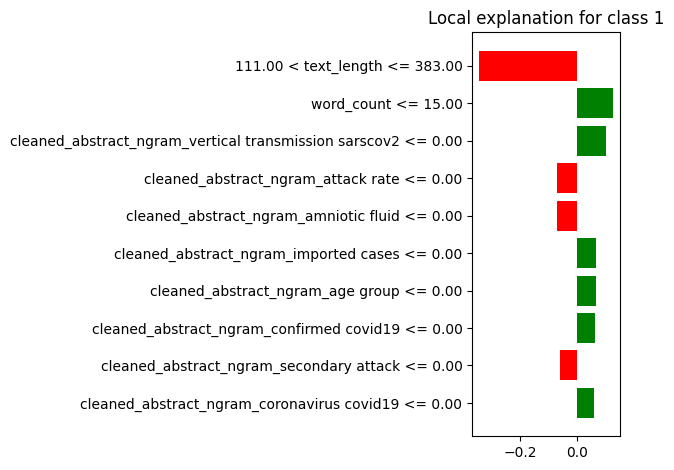

In [25]:
import matplotlib.pyplot as plt

exp.as_pyplot_figure()
plt.tight_layout()

### Incorrect prediction by model

In [26]:
exp = explainer.explain_instance(X_test.loc[2],model_lr.predict_proba)

exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Intercept 0.5278528757490754
Prediction_local [0.88527369]
Right: 0.9667622290647714


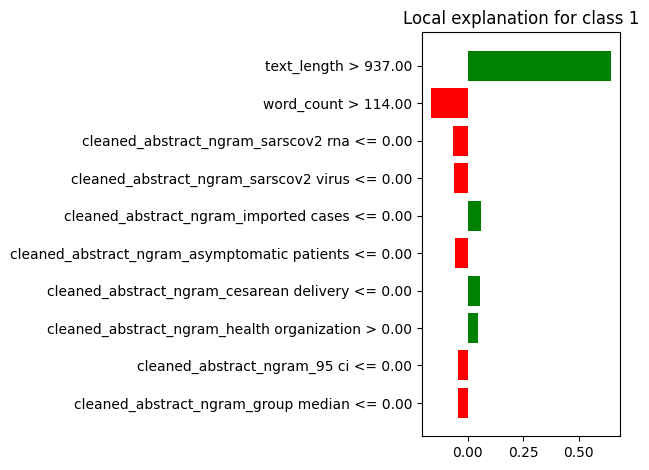

In [27]:
import matplotlib.pyplot as plt

exp.as_pyplot_figure()
plt.tight_layout()

## Using SHAP for explanations

In [28]:
import shap

In [30]:
explainer = shap.Explainer(model_lr, X_train)
shap_values = explainer(X_test)

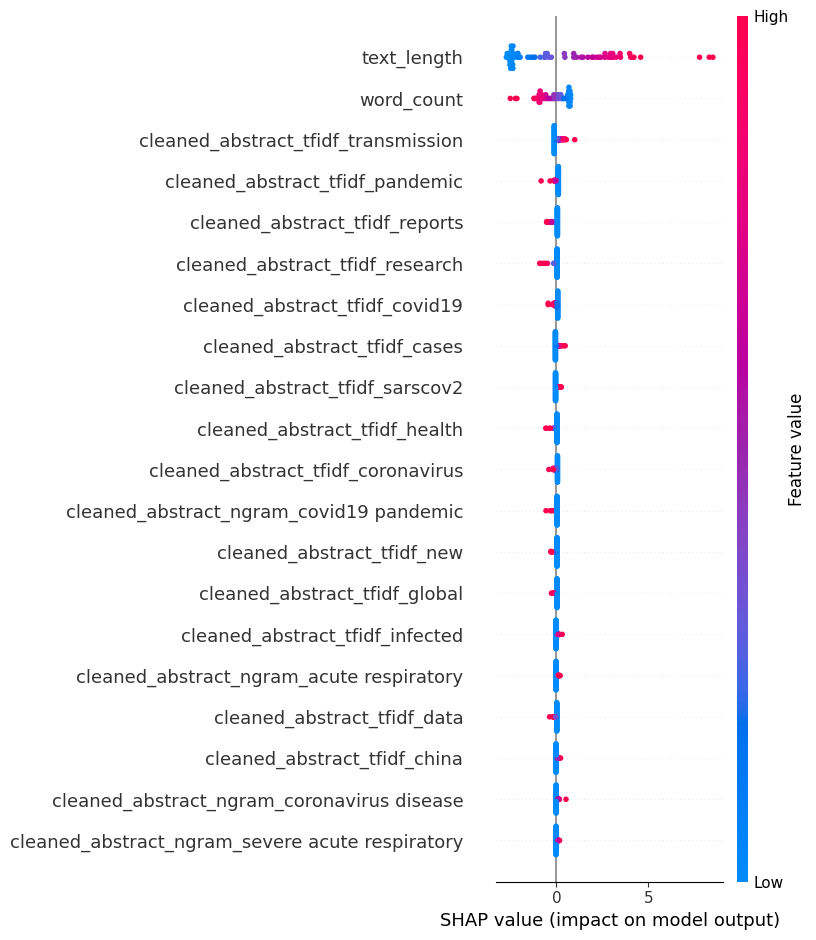

In [31]:
shap.initjs()

#A summary plot with the shapley value (feature importance)
shap.summary_plot(shap_values, X_test)

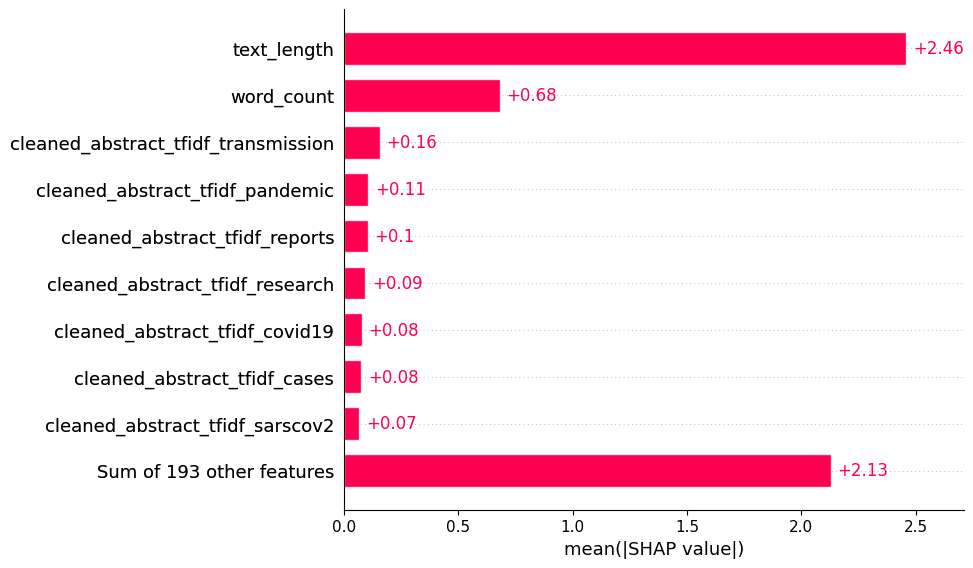

In [32]:
shap.plots.bar(shap_values)

### For a particular instance

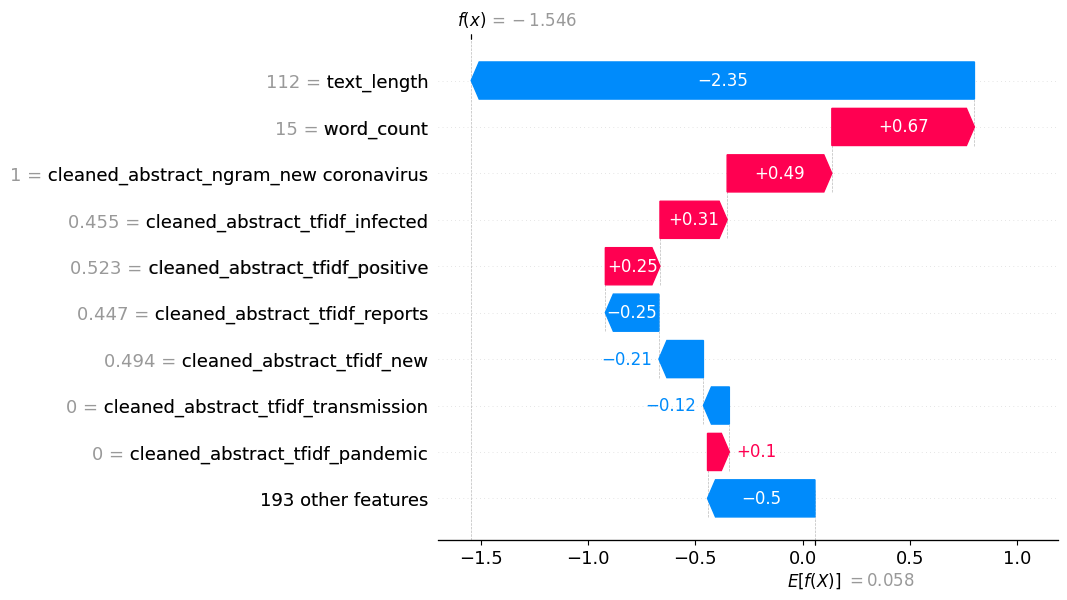

In [33]:
shap.plots.waterfall(shap_values[0])